In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


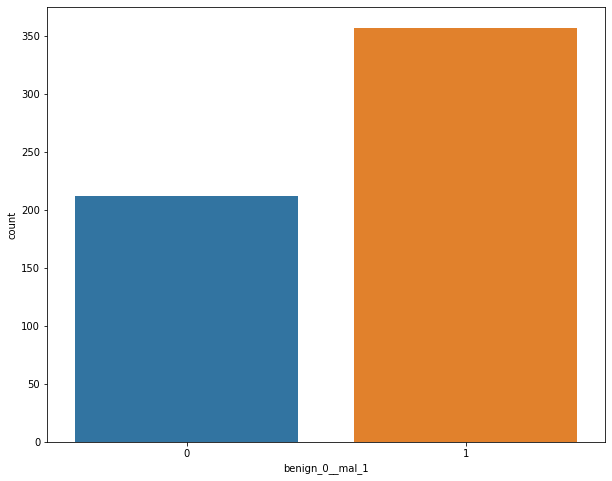

In [15]:
plt.figure(figsize=(10,8))
sb.countplot(df['benign_0__mal_1'])

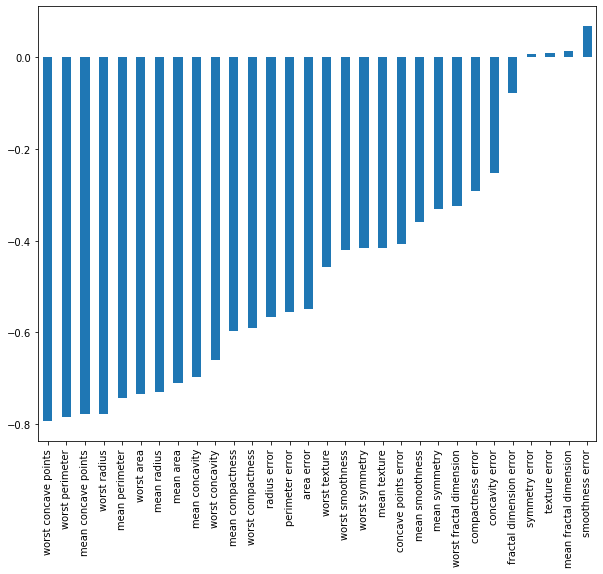

In [17]:
plt.figure(figsize=(10,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

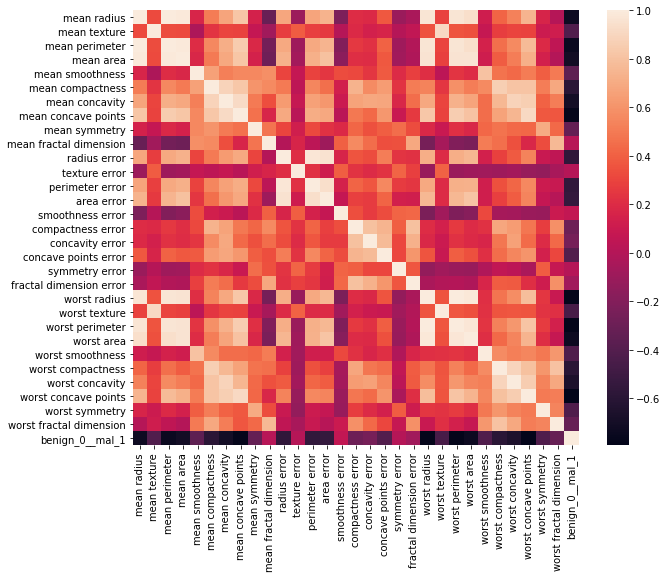

In [19]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr())

**Splitting the data**

In [20]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import activations

In [31]:
model = Sequential()
model.add(Dense(30, activation = activations.relu))
model.add(Dense(15, activation = activations.relu))

model.add(Dense(1, activation = activations.sigmoid))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600)

Epoch 1/600
12/12 [==============================] - 0s 16ms/step - loss: 0.6753 - val_loss: 0.6626
Epoch 2/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6514 - val_loss: 0.6379
Epoch 3/600
12/12 [==============================] - 0s 4ms/step - loss: 0.6260 - val_loss: 0.6112
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5965 - val_loss: 0.5778
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5626 - val_loss: 0.5421
Epoch 6/600
12/12 [==============================] - 0s 4ms/step - loss: 0.5253 - val_loss: 0.5018
Epoch 7/600
12/12 [==============================] - 0s 4ms/step - loss: 0.4851 - val_loss: 0.4606
Epoch 8/600
12/12 [==============================] - 0s 4ms/step - loss: 0.4435 - val_loss: 0.4202
Epoch 9/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4035 - val_loss: 0.3815
Epoch 10/600
12/12 [==============================] - 0s 2ms/step - loss: 0.3653 - val_loss: 0.3472
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0585 - val_loss: 0.0668
Epoch 84/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0564 - val_loss: 0.0638
Epoch 85/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0641
Epoch 86/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0545 - val_loss: 0.0640
Epoch 87/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0544 - val_loss: 0.0637
Epoch 88/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0629
Epoch 89/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0633
Epoch 90/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0628
Epoch 91/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0618
Epoch 92/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0625
Epoch 93/600


12/12 [==============================] - 0s 2ms/step - loss: 0.0407 - val_loss: 0.0642
Epoch 165/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0405 - val_loss: 0.0602
Epoch 166/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0407 - val_loss: 0.0599
Epoch 167/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0388 - val_loss: 0.0603
Epoch 168/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.0611
Epoch 169/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.0609
Epoch 170/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0392 - val_loss: 0.0597
Epoch 171/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.0608
Epoch 172/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.0614
Epoch 173/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0409 - val_loss: 0.0617
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0306 - val_loss: 0.0848
Epoch 246/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.0754
Epoch 247/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0304 - val_loss: 0.0805
Epoch 248/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0299 - val_loss: 0.0787
Epoch 249/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.0818
Epoch 250/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0306 - val_loss: 0.0789
Epoch 251/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0295 - val_loss: 0.0806
Epoch 252/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0299 - val_loss: 0.0871
Epoch 253/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0298 - val_loss: 0.0766
Epoch 254/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0295 - val_loss: 0.0829
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0987
Epoch 327/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.1073
Epoch 328/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.1111
Epoch 329/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.1045
Epoch 330/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.1116
Epoch 331/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.1049
Epoch 332/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.1076
Epoch 333/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0234 - val_loss: 0.1210
Epoch 334/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.1081
Epoch 335/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1167
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.1381
Epoch 408/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.1369
Epoch 409/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.1391
Epoch 410/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.1372
Epoch 411/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.1471
Epoch 412/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.1382
Epoch 413/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.1414
Epoch 414/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.1413
Epoch 415/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.1390
Epoch 416/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.1449
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.1672
Epoch 489/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.1669
Epoch 490/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.1635
Epoch 491/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.1646
Epoch 492/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.1717
Epoch 493/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1640
Epoch 494/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.1690
Epoch 495/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.1746
Epoch 496/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.1641
Epoch 497/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.1752
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.1920
Epoch 570/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.1823
Epoch 571/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.1903
Epoch 572/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.1952
Epoch 573/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.1895
Epoch 574/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.1828
Epoch 575/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.1869
Epoch 576/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.1933
Epoch 577/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.1866
Epoch 578/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.1882
Epoc

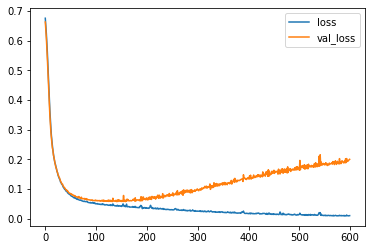

In [34]:
pd.DataFrame(model.history.history).plot()

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
model = Sequential()
model.add(Dense(30, activation = activations.relu))
model.add(Dense(15, activation = activations.relu))

model.add(Dense(1, activation = activations.sigmoid))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [53]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Epoch 1/600
12/12 [==============================] - 0s 9ms/step - loss: 0.6766 - val_loss: 0.6545
Epoch 2/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6473 - val_loss: 0.6267
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6198 - val_loss: 0.5970
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5894 - val_loss: 0.5651
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5555 - val_loss: 0.5290
Epoch 6/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5186 - val_loss: 0.4926
Epoch 7/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4800 - val_loss: 0.4536
Epoch 8/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4413 - val_loss: 0.4147
Epoch 9/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4028 - val_loss: 0.3827
Epoch 10/600
12/12 [==============================] - 0s 3ms/step - loss: 0.3694 - val_loss: 0.3470
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.0619 - val_loss: 0.0664
Epoch 81/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0629 - val_loss: 0.0676
Epoch 82/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0632 - val_loss: 0.0668
Epoch 83/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0626 - val_loss: 0.0662
Epoch 84/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0600 - val_loss: 0.0681
Epoch 85/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0607 - val_loss: 0.0641
Epoch 86/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0596 - val_loss: 0.0648
Epoch 87/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0584 - val_loss: 0.0662
Epoch 88/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0643
Epoch 89/600
12/12 [==============================] - 0s 4ms/step - loss: 0.0585 - val_loss: 0.0634
Epoch 90/600


12/12 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.0519
Epoch 162/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0442 - val_loss: 0.0544
Epoch 163/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.0510
Epoch 164/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0556
Epoch 165/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0363 - val_loss: 0.0515
Epoch 166/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0369 - val_loss: 0.0577
Epoch 167/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0499
Epoch 168/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0382 - val_loss: 0.0554
Epoch 169/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.0509
Epoch 170/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0356 - val_loss: 0.0531
Epoc

In [54]:
model_loss = pd.DataFrame(model.history.history)

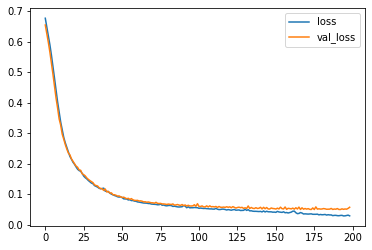

In [56]:
model_loss.plot()

# DropOut

In [59]:
model = Sequential()
model.add(Dense(30, activation = activations.relu))
model.add(Dropout(0.5))
model.add(Dense(15, activation = activations.relu))
model.add(Dropout(0.5))

model.add(Dense(1, activation = activations.sigmoid))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [60]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Epoch 1/600
12/12 [==============================] - 0s 9ms/step - loss: 0.7310 - val_loss: 0.7102
Epoch 2/600
12/12 [==============================] - 0s 2ms/step - loss: 0.7044 - val_loss: 0.6869
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6938 - val_loss: 0.6687
Epoch 4/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6706 - val_loss: 0.6508
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6663 - val_loss: 0.6355
Epoch 6/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6501 - val_loss: 0.6193
Epoch 7/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6356 - val_loss: 0.5981
Epoch 8/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6265 - val_loss: 0.5788
Epoch 9/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6054 - val_loss: 0.5592
Epoch 10/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5863 - val_loss: 0.5347
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.1372 - val_loss: 0.0812
Epoch 84/600
12/12 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.0838
Epoch 85/600
12/12 [==============================] - 0s 2ms/step - loss: 0.1356 - val_loss: 0.0834
Epoch 86/600
12/12 [==============================] - 0s 2ms/step - loss: 0.1378 - val_loss: 0.0817
Epoch 87/600
12/12 [==============================] - 0s 2ms/step - loss: 0.1545 - val_loss: 0.0840
Epoch 88/600
12/12 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.0768
Epoch 89/600
12/12 [==============================] - 0s 3ms/step - loss: 0.1179 - val_loss: 0.0749
Epoch 90/600
12/12 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.0743
Epoch 91/600
12/12 [==============================] - 0s 2ms/step - loss: 0.1594 - val_loss: 0.0763
Epoch 92/600
12/12 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.0763
Epoch 93/600


12/12 [==============================] - 0s 3ms/step - loss: 0.0938 - val_loss: 0.0601
Epoch 165/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0964 - val_loss: 0.0590
Epoch 166/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0810 - val_loss: 0.0643
Epoch 167/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0804 - val_loss: 0.0595
Epoch 168/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0918 - val_loss: 0.0547
Epoch 169/600
12/12 [==============================] - 0s 3ms/step - loss: 0.1052 - val_loss: 0.0533
Epoch 170/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0818 - val_loss: 0.0572
Epoch 171/600
12/12 [==============================] - 0s 2ms/step - loss: 0.1041 - val_loss: 0.0604
Epoch 172/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0938 - val_loss: 0.0533
Epoch 173/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0746 - val_loss: 0.0524
Epoc

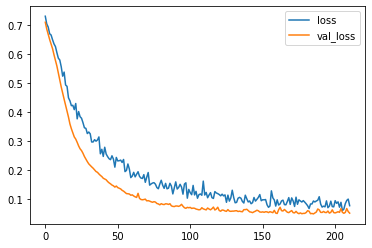

In [61]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [64]:
predictions = model.predict_classes(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.99      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
print(confusion(y_test, predictions))